In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def read_arrf(file):
    with open(file, encoding="utf-8") as f:
        header = []
        for line in f:
            if line.startswith("@attribute"):
                header.append(line.split(sep='\'')[1])
            elif line.startswith("@data"):
                break
        df = pd.read_csv(f, header=None)
        df.columns = header
    return df

In [3]:
train_data = read_arrf("../NSL-KDD/KDDTrain+.arff")
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)
test_df = read_arrf('../NSL-KDD/KDDTest+.arff')

投毒

In [4]:
# 获取行数
total_rows = train_df.shape[0]

# 准备一个用于保存修改后的数据集的列表
poisoned_datasets = []

df = train_df.copy()

# 循环取出2%, 4%, 6%, 8%, 10%的数据
for i in range(1, 4):
    # 计算要取出的行数
    rows = int(total_rows * i * 2 / 100)
    
    # 创建数据的一个新的副本
    df_copy = df.copy()
    
    # 取出数据
    subset_df = df_copy.iloc[:rows]

    # 将所有数值型属性的值修改为500000
    numeric_cols = subset_df.select_dtypes(include='number').columns
    subset_df.loc[:, numeric_cols] = 500000
    
    # 替换回原始数据集的相应位置
    df_copy.update(subset_df)
    
    # 将修改后的数据集保存到列表中
    poisoned_datasets.append(df_copy)

# poisoned_datasets 现在包含了5个数据集，每个数据集的不同比例的数据已经被“投毒”

/tmp/ipykernel_6409/2983078229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, numeric_cols] = 500000
/tmp/ipykernel_6409/2983078229.py:22: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_df.loc[:, numeric_cols] = 500000
/tmp/ipykernel_6409/2983078229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [5]:
train_df = train_df.sample(frac=1.0, random_state=42)
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
4874,0,tcp,http,SF,296,1645,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
103996,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.09,0.00,0.00,1.0,1.0,0.00,0.0,anomaly
115562,0,tcp,http,SF,320,10908,0,0,0,0,...,255,1.00,0.00,0.50,0.06,0.0,0.0,0.00,0.0,normal
91319,0,tcp,ftp_data,SF,12,0,0,0,0,0,...,70,0.22,0.03,0.22,0.03,0.0,0.0,0.00,0.0,normal
108923,0,tcp,smtp,SF,956,302,0,0,0,0,...,67,0.26,0.28,0.00,0.03,0.0,0.0,0.26,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86770,0,tcp,private,REJ,0,0,0,0,0,0,...,9,0.04,0.08,0.00,0.00,0.0,0.0,1.00,1.0,anomaly
18942,0,udp,other,SF,1,0,0,0,0,0,...,1,0.00,0.22,1.00,0.00,0.0,0.0,0.00,0.0,anomaly
111898,0,tcp,http,SF,235,20622,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.0,0.0,0.00,0.0,normal
26554,0,udp,domain_u,SF,46,85,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal


In [6]:
for i in range(0, 3):
    poisoned_datasets[i] = poisoned_datasets[i].sample(frac=1.0, random_state=42)

In [7]:
test_df = test_df.sample(frac=1.0, random_state=42)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
6186,0,tcp,smtp,SF,914,329,0,0,0,0,...,155,0.61,0.06,0.00,0.00,0.00,0.00,0.01,0.01,normal
247,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
4343,0,tcp,smtp,SF,1012,338,0,0,0,0,...,169,0.73,0.04,0.01,0.01,0.00,0.00,0.00,0.00,normal
17527,0,tcp,http,SF,243,667,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
13123,0,tcp,http,SF,227,286,0,0,0,0,...,255,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,tcp,telnet,S0,0,0,0,0,0,0,...,86,0.34,0.01,0.00,0.02,1.00,1.00,0.00,0.00,anomaly
21575,0,tcp,kshell,S0,0,0,0,0,0,0,...,2,0.01,0.18,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
5390,1,tcp,imap4,RSTO,0,44,0,0,0,0,...,40,0.16,0.03,0.00,0.00,0.02,0.08,0.56,0.88,anomaly
860,282,tcp,ftp,SF,162,599,0,0,0,2,...,57,0.22,0.03,0.00,0.00,0.13,0.00,0.02,0.00,anomaly


In [8]:
val_df = val_df.sample(frac=1.0, random_state=42)
val_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
57177,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.01,0.91,0.93,0.00,0.93,1.0,0.00,0.0,anomaly
39417,0,tcp,http,SF,283,679,0,0,0,0,...,255,1.00,0.00,0.04,0.07,0.00,0.0,0.00,0.0,normal
64677,0,tcp,http,SF,232,503,0,0,0,0,...,255,1.00,0.00,0.20,0.02,0.00,0.0,0.00,0.0,normal
15951,0,tcp,http,SF,337,474,0,0,0,0,...,255,1.00,0.00,0.06,0.03,0.00,0.0,0.06,0.0,normal
119038,0,icmp,eco_i,SF,18,0,0,0,0,0,...,13,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,0,tcp,smtp,SF,906,408,0,0,0,0,...,215,0.32,0.09,0.05,0.01,0.68,0.0,0.00,0.0,normal
79678,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.06,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
72515,0,tcp,private,REJ,0,0,0,0,0,0,...,11,0.12,0.09,0.01,0.00,0.00,0.0,1.00,1.0,anomaly
79319,0,tcp,ftp_data,SF,12983,0,0,0,0,0,...,111,0.44,0.02,0.44,0.00,0.00,0.0,0.00,0.0,normal


In [9]:
pos_train_xs = []
pos_train_ys = []
pos_num_features = []
pos_one_hots = []

train_x = train_df.iloc[:, :-1]
test_x = test_df.iloc[:, :-1]
val_x = val_df.iloc[:, :-1]
for i in range(0, 3):
    pos_train_xs.append(poisoned_datasets[i].iloc[:, :-1])
col_feature = train_x.dtypes[train_x.dtypes == 'object'].index
num_feature = train_x.dtypes[train_x.dtypes != 'object'].index

def min_max_normalization(data):
    #对原始数据进行min-max归一化处理
        max_val = max(data)
        min_val = min(data)
        if min_val == max_val:
            return data
        else:
            norm_data = [(x - min_val) / (max_val - min_val) for x in data]
            return norm_data

train_num_feature = train_x[num_feature].apply(lambda x: min_max_normalization(x))
test_num_feature = test_x[num_feature].apply(lambda x: min_max_normalization(x))
val_num_feature = val_x[num_feature].apply(lambda x: min_max_normalization(x))
for i in range(0, 3):
    pos_num_features.append(pos_train_xs[i][num_feature].apply(lambda x: min_max_normalization(x)))

train_one_hot = pd.get_dummies(train_x[col_feature], dummy_na=True)
val_one_hot = pd.get_dummies(val_x[col_feature], dummy_na=True)
for i in range(0, 3):
    pos_one_hots.append(pd.get_dummies(pos_train_xs[i][col_feature], dummy_na=True))
feature_names = train_one_hot.columns
test_one_hot = pd.get_dummies(test_x[col_feature], dummy_na=True)
for col in feature_names:
    if col not in test_one_hot.columns:
        test_one_hot[col] = 0
for col_1 in feature_names:
    if col_1 not in val_one_hot.columns:
        val_one_hot[col_1] = 0
# 调整特征的顺序
test_encoded = test_one_hot[feature_names]
train_y = train_df.iloc[:, -1]
test_y = test_df.iloc[:, -1]
val_y = val_df.iloc[:, -1]
for i in range(0, 3):
    pos_train_ys.append(poisoned_datasets[i].iloc[:, -1])

mapping = {'normal':0, 'anomaly':1}
train_y = train_y.map(mapping).T
test_y = test_y.map(mapping).T
val_y = val_y.map(mapping).T
for i in range(0, 3):
    pos_train_ys[i] = pos_train_ys[i].map(mapping).T

train_x = pd.concat([train_one_hot, train_num_feature], axis=1).values
test_x = pd.concat([test_one_hot, test_num_feature], axis=1).values
val_x = pd.concat([val_one_hot, val_num_feature], axis=1).values
for i in range(0, 3):
    pos_train_xs[i] = pd.concat([pos_one_hots[i], pos_num_features[i]], axis=1).values
train_x = np.array(train_x)
train_y = np.array(train_y).reshape(-1, 1)
test_x = np.array(test_x)
test_y = np.array(test_y).reshape(-1, 1)
val_x = np.array(val_x)
val_y = np.array(val_y).reshape(-1, 1) 
for i in range(0, 3):
    pos_train_xs[i] = np.array(pos_train_xs[i])
    pos_train_ys[i] = np.array(pos_train_ys[i]).reshape(-1, 1)

In [10]:
def auc(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [11]:
class MLP():
    def __init__(self, input_size, hidden1_size=64, hidden2_size=32, output_size=1):
        self.W1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size)
        self.b3 = np.zeros((1, output_size))
        self.h1_relu = None
        self.h2_relu = None
        self.eps = 1e-7
        self.pos_weight = 0.5
        
    def forward(self, x):
        h1 = np.dot(x, self.W1) + self.b1
        self.h1_relu = np.maximum(0, h1)
        h2 = np.dot(self.h1_relu, self.W2) + self.b2
        self.h2_relu = np.maximum(0, h2)
        y_pred = np.dot(self.h2_relu, self.W3) + self.b3
        y_pred = 1 / (1 + np.exp(-y_pred))  # 输出用sigmoid激活
        return y_pred 
    
    def BCELoss(self, y_pred, y_true):
        eps = self.eps
        pos_weight = self.pos_weight
        return -((1 - pos_weight) * y_true * np.log(y_pred + eps) + pos_weight * (1 - y_true) * np.log(1 - y_pred + eps)).mean()
    
    def backward(self, x, y, y_pred, lr):
        m = x.shape[0]
        eps = self.eps
        dloss = (y_pred - y) / m
        dW3 = np.dot(self.h2_relu.T, dloss)
        db3 = np.sum(dloss, axis=0, keepdims=True)
        dhidden2 = np.dot(dloss, self.W3.T)
        dhidden2[self.h2_relu <= 0] = 0
        dW2 = np.dot(self.h1_relu.T, dhidden2)
        db2 = np.sum(dhidden2, axis=0, keepdims=True)
        dhidden1 = np.dot(dhidden2, self.W2.T)
        dhidden1[self.h1_relu <= 0] = 0
        dW1 = np.dot(x.T, dhidden1)
        db1 = np.sum(dhidden1, axis=0, keepdims=True)
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred > 0.5).astype(int)

    def train(self, x, y, val_x, val_y, lr, epochs, batch_size=None):
        m = x.shape[0]
        ll = []
        ll_val = []
        aa = []
        aa_val = []
        if batch_size is None:
            batch_size = m
        val_loss = self.BCELoss(self.forward(val_x), val_y)
        loss = val_loss
        ll.append(loss)
        ll_val.append(val_loss)
        aa.append(0)
        aa_val.append(0)

        for epoch in range(epochs):
            shuffled_indices = np.random.permutation(m)  # 将所有数据打乱
            x_shuffled = x[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            num_batches = m // batch_size  # 计算批次数量

            # 对每个批次进行训练
            for i in range(num_batches):
                start = i * batch_size
                end = start + batch_size
                x_batch = x_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                y_pred = self.forward(x_batch)
                self.backward(x_batch, y_batch, y_pred, lr)

            # 计算全量数据的损失和精度
            y_p = self.forward(x)
            loss = self.BCELoss(y_p, y)
            acc = auc(y, self.predict(x))

            # 在测试集上计算准确率和损失
            val_loss = self.BCELoss(self.forward(val_x), val_y)
            acc_val = auc(val_y, self.predict(val_x))
            print(f'Epoch {epoch + 1}/{epochs}, loss: {loss:.4f}, acc: {acc:.4f}, val_loss: {val_loss:.4f}, val_acc : {acc_val:.4f}')
            ll.append(loss)
            ll_val.append(val_loss)
            aa.append(acc)
            aa_val.append(acc_val)
        return ll, ll_val, aa, aa_val

In [12]:
# 创建一个 MLP 实例
mlp = MLP(input_size=train_x.shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll, ll_val, aa, aa_val = mlp.train(train_x, train_y, val_x, val_y, lr=0.01, epochs=60, batch_size=2048)

Epoch 1/60, loss: 0.3845, acc: 0.9192, val_loss: 1.3176, val_acc : 0.7374
Epoch 2/60, loss: 0.2665, acc: 0.9312, val_loss: 0.8267, val_acc : 0.7739
Epoch 3/60, loss: 0.2066, acc: 0.9368, val_loss: 0.6615, val_acc : 0.8693
Epoch 4/60, loss: 0.1678, acc: 0.9446, val_loss: 0.6179, val_acc : 0.8809
Epoch 5/60, loss: 0.1436, acc: 0.9524, val_loss: 0.6001, val_acc : 0.8849
Epoch 6/60, loss: 0.1276, acc: 0.9561, val_loss: 0.5915, val_acc : 0.8862
Epoch 7/60, loss: 0.1166, acc: 0.9583, val_loss: 0.5867, val_acc : 0.8859
Epoch 8/60, loss: 0.1075, acc: 0.9595, val_loss: 0.5848, val_acc : 0.8862
Epoch 9/60, loss: 0.1002, acc: 0.9606, val_loss: 0.5837, val_acc : 0.8857
Epoch 10/60, loss: 0.0940, acc: 0.9622, val_loss: 0.5838, val_acc : 0.8844
Epoch 11/60, loss: 0.0888, acc: 0.9639, val_loss: 0.5869, val_acc : 0.8799
Epoch 12/60, loss: 0.0847, acc: 0.9654, val_loss: 0.5862, val_acc : 0.8786
Epoch 13/60, loss: 0.0811, acc: 0.9670, val_loss: 0.5907, val_acc : 0.8753
Epoch 14/60, loss: 0.0782, acc: 0.

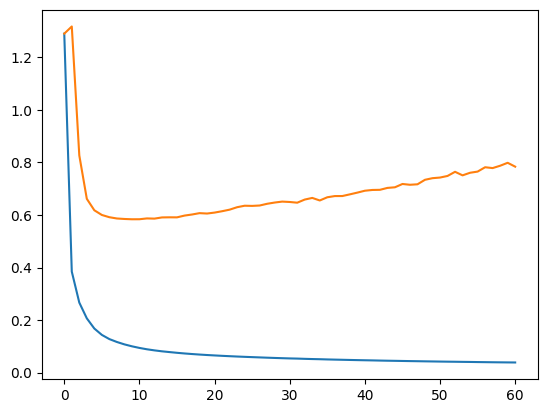

In [13]:
plt.plot(ll)
plt.plot(ll_val)

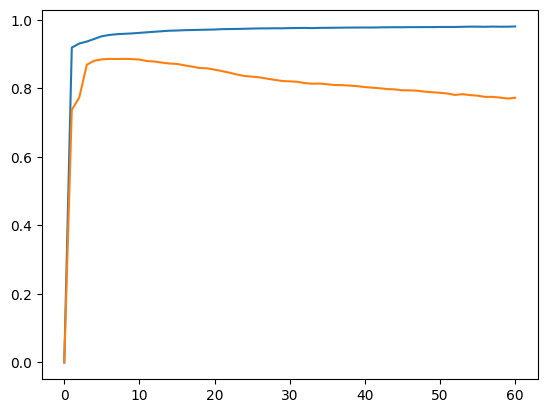

In [14]:
plt.plot(aa)
plt.plot(aa_val)

In [15]:
y_test_pred = mlp.predict(test_x)
test_acc = auc(test_y, y_test_pred)
test_loss = mlp.BCELoss(mlp.forward(test_x), test_y)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 71.41%
Test Loss: 1.4673


### 投毒攻击

In [16]:
ll_poisons = []
ll_val_poisons = []
aa_poisons = []
aa_val_poisons = []
pos_acc = []
pos_acc.append(test_acc)

In [17]:
# 再创建一个 MLP 实例
mlp_poison_0 = MLP(input_size=pos_train_xs[0].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_0.train(pos_train_xs[0], pos_train_ys[0], val_x, val_y, lr=0.01, epochs=60, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/60, loss: 0.4171, acc: 0.8750, val_loss: 4.0831, val_acc : 0.4534
Epoch 2/60, loss: 0.2310, acc: 0.9128, val_loss: 4.1419, val_acc : 0.4568
Epoch 3/60, loss: 0.1850, acc: 0.9295, val_loss: 4.1450, val_acc : 0.4578
Epoch 4/60, loss: 0.1653, acc: 0.9443, val_loss: 4.1357, val_acc : 0.4583
Epoch 5/60, loss: 0.1522, acc: 0.9464, val_loss: 4.1239, val_acc : 0.4583
Epoch 6/60, loss: 0.1422, acc: 0.9489, val_loss: 4.1109, val_acc : 0.4586
Epoch 7/60, loss: 0.1343, acc: 0.9499, val_loss: 4.0985, val_acc : 0.4591
Epoch 8/60, loss: 0.1279, acc: 0.9513, val_loss: 4.0877, val_acc : 0.4596
Epoch 9/60, loss: 0.1221, acc: 0.9496, val_loss: 4.0717, val_acc : 0.4594
Epoch 10/60, loss: 0.1169, acc: 0.9498, val_loss: 4.0593, val_acc : 0.4596
Epoch 11/60, loss: 0.1126, acc: 0.9519, val_loss: 4.0464, val_acc : 0.4595
Epoch 12/60, loss: 0.1088, acc: 0.9521, val_loss: 4.0348, val_acc : 0.4594
Epoch 13/60, loss: 0.1057, acc: 0.9521, val_loss: 4.0246, val_acc : 0.4594
Epoch 14/60, loss: 0.1027, acc: 0.

In [18]:
y_pos_test_pred_0 = mlp_poison_0.predict(test_x)
test_acc_0 = auc(test_y, y_pos_test_pred_0)
test_loss_0 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_0)
print("Test Accuracy of 2% poison: {:.2f}%".format(test_acc_0 * 100))
print(f"Test Loss of 2% poison: {test_loss_0:.4f}")

Test Accuracy of 2% poison: 42.37%
Test Loss of 2% poison: 1.4673


In [19]:
# 再创建一个 MLP 实例
mlp_poison_1 = MLP(input_size=pos_train_xs[1].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_1.train(pos_train_xs[1], pos_train_ys[1], val_x, val_y, lr=0.01, epochs=60, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/60, loss: 0.3982, acc: 0.8946, val_loss: 5.6880, val_acc : 0.1673
Epoch 2/60, loss: 0.2611, acc: 0.9198, val_loss: 5.6803, val_acc : 0.1738
Epoch 3/60, loss: 0.1922, acc: 0.9299, val_loss: 5.6169, val_acc : 0.1746
Epoch 4/60, loss: 0.1581, acc: 0.9368, val_loss: 5.5729, val_acc : 0.1752
Epoch 5/60, loss: 0.1374, acc: 0.9406, val_loss: 5.5281, val_acc : 0.1779
Epoch 6/60, loss: 0.1232, acc: 0.9447, val_loss: 5.5158, val_acc : 0.1750
Epoch 7/60, loss: 0.1126, acc: 0.9474, val_loss: 5.4747, val_acc : 0.1750
Epoch 8/60, loss: 0.1050, acc: 0.9466, val_loss: 5.4759, val_acc : 0.1711
Epoch 9/60, loss: 0.1001, acc: 0.9525, val_loss: 5.4618, val_acc : 0.1704
Epoch 10/60, loss: 0.0967, acc: 0.9534, val_loss: 5.4849, val_acc : 0.1616
Epoch 11/60, loss: 0.0935, acc: 0.9532, val_loss: 5.4905, val_acc : 0.1593
Epoch 12/60, loss: 0.0909, acc: 0.9542, val_loss: 5.5053, val_acc : 0.1577
Epoch 13/60, loss: 0.0886, acc: 0.9553, val_loss: 5.5230, val_acc : 0.1557
Epoch 14/60, loss: 0.0865, acc: 0.

In [20]:
y_pos_test_pred_1 = mlp_poison_1.predict(test_x)
test_acc_1 = auc(test_y, y_pos_test_pred_1)
test_loss_1 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_1)
print("Test Accuracy of 4% poison: {:.2f}%".format(test_acc_1 * 100))
print(f"Test Loss of 4% poison: {test_loss_1:.4f}")

Test Accuracy of 4% poison: 66.86%
Test Loss of 4% poison: 1.4673


In [21]:
# 再创建一个 MLP 实例
mlp_poison_2 = MLP(input_size=pos_train_xs[2].shape[1], hidden1_size=64, hidden2_size=32, output_size=1)

# 训练模型
ll_poison, ll_val_poison, aa_poison, aa_val_poison = mlp_poison_2.train(pos_train_xs[2], pos_train_ys[2], val_x, val_y, lr=0.01, epochs=60, batch_size=2048)
ll_poisons.append(ll_poison)
ll_val_poisons.append(ll_val_poison)
aa_poisons.append(aa_poison)
aa_val_poisons.append(aa_val_poison)

Epoch 1/60, loss: 0.3862, acc: 0.9031, val_loss: 5.0835, val_acc : 0.2694
Epoch 2/60, loss: 0.2732, acc: 0.9298, val_loss: 4.8357, val_acc : 0.3105
Epoch 3/60, loss: 0.2129, acc: 0.9336, val_loss: 4.6933, val_acc : 0.3474
Epoch 4/60, loss: 0.1709, acc: 0.9391, val_loss: 4.6192, val_acc : 0.3627
Epoch 5/60, loss: 0.1495, acc: 0.9403, val_loss: 4.5748, val_acc : 0.3689
Epoch 6/60, loss: 0.1364, acc: 0.9413, val_loss: 4.5568, val_acc : 0.3705
Epoch 7/60, loss: 0.1269, acc: 0.9444, val_loss: 4.5301, val_acc : 0.3736
Epoch 8/60, loss: 0.1200, acc: 0.9463, val_loss: 4.5134, val_acc : 0.3764
Epoch 9/60, loss: 0.1155, acc: 0.9534, val_loss: 4.4920, val_acc : 0.3833
Epoch 10/60, loss: 0.1131, acc: 0.9557, val_loss: 4.4829, val_acc : 0.3876
Epoch 11/60, loss: 0.1115, acc: 0.9546, val_loss: 4.4726, val_acc : 0.3935
Epoch 12/60, loss: 0.1102, acc: 0.9573, val_loss: 4.4762, val_acc : 0.3909
Epoch 13/60, loss: 0.1090, acc: 0.9581, val_loss: 4.4728, val_acc : 0.3931
Epoch 14/60, loss: 0.1081, acc: 0.

In [22]:
y_pos_test_pred_2 = mlp_poison_2.predict(test_x)
test_acc_2 = auc(test_y, y_pos_test_pred_2)
test_loss_2 = mlp.BCELoss(mlp.forward(test_x), test_y)
pos_acc.append(test_acc_2)
print("Test Accuracy of 6% poison: {:.2f}%".format(test_acc_2 * 100))
print(f"Test Loss of 6% poison: {test_loss_2:.4f}")

Test Accuracy of 6% poison: 49.21%
Test Loss of 6% poison: 1.4673


In [23]:
poison_percents = [2, 4, 6]  # 投毒比例

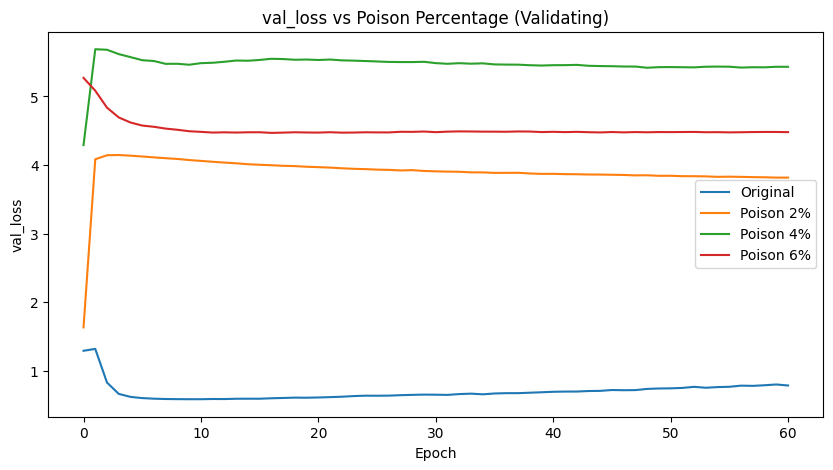

In [24]:
# 绘制val_loss的变化
plt.figure(figsize=(10, 5))
plt.plot(ll_val, label='Original')
for i in range(3):
    plt.plot(ll_val_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('val_loss vs Poison Percentage (Validating)')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

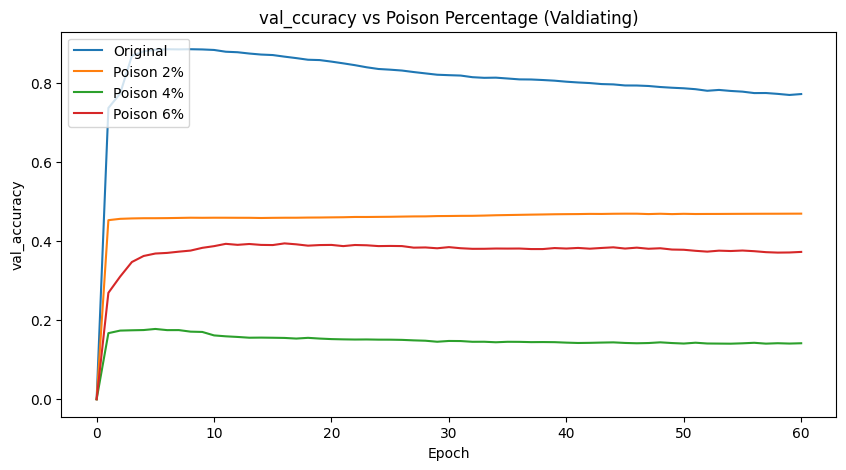

In [25]:
# 绘制test accuracy的变化
plt.figure(figsize=(10, 5))
plt.plot(aa_val, label='Original')
for i in range(3):
    plt.plot(aa_val_poisons[i], label=f'Poison {poison_percents[i]}%')
plt.title('val_ccuracy vs Poison Percentage (Valdiating)')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

In [26]:
acc_xlabel = [0, 2, 4, 6]

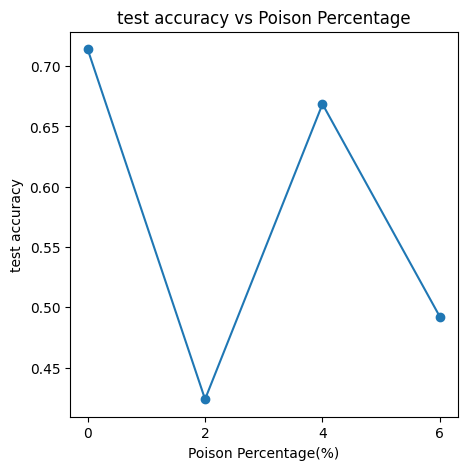

In [27]:
# 绘制accuracy随poison percentage的变化
plt.figure(figsize=(5, 5))
plt.plot(acc_xlabel, pos_acc, marker='o')
plt.title('test accuracy vs Poison Percentage')
plt.xlabel('Poison Percentage(%)')
plt.ylabel('test accuracy')
plt.xticks(acc_xlabel)
plt.show()
